In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving turkiye-student-evaluation_generic.csv to turkiye-student-evaluation_generic (1).csv


In [ ]:
turkiye_dataset = pd.read_csv("turkiye-student-evaluation_generic.csv")

In [ ]:
turkiye_dataset.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Checking for missing values using isnull()
missing_values = turkiye_dataset.isnull()
print(missing_values)

      instr  class  nb.repeat  attendance  difficulty     Q1     Q2     Q3  \
0     False  False      False       False       False  False  False  False   
1     False  False      False       False       False  False  False  False   
2     False  False      False       False       False  False  False  False   
3     False  False      False       False       False  False  False  False   
4     False  False      False       False       False  False  False  False   
...     ...    ...        ...         ...         ...    ...    ...    ...   
5815  False  False      False       False       False  False  False  False   
5816  False  False      False       False       False  False  False  False   
5817  False  False      False       False       False  False  False  False   
5818  False  False      False       False       False  False  False  False   
5819  False  False      False       False       False  False  False  False   

         Q4     Q5  ...    Q19    Q20    Q21    Q22    Q23    Q

In [ ]:
# Count missing values per column
missing_counts = turkiye_dataset.isnull().sum()
print(missing_counts)

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64


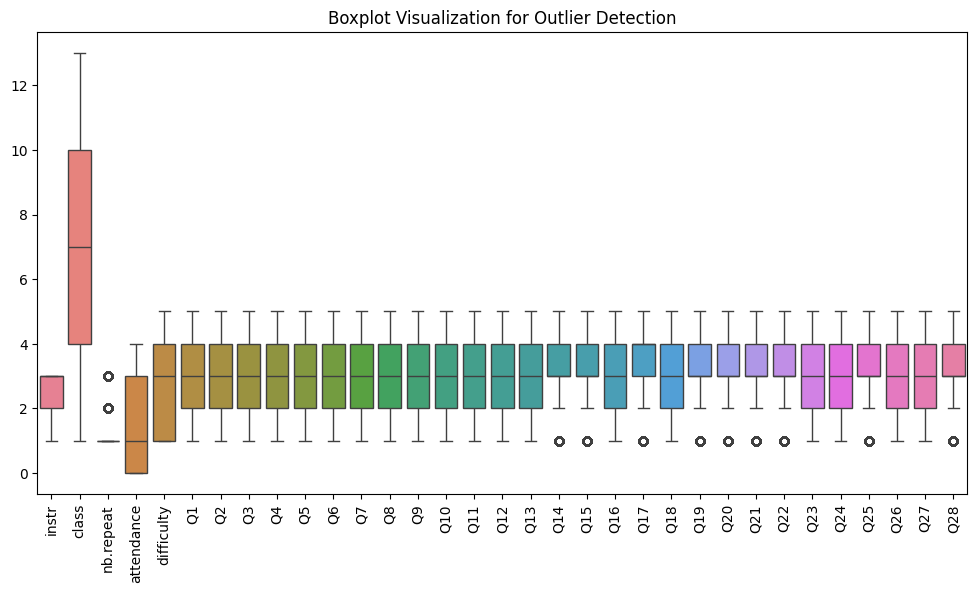

In [ ]:
# Visualizing outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=turkiye_dataset)
plt.xticks(rotation=90)
plt.title("Boxplot Visualization for Outlier Detection")
plt.show()

In [ ]:
# Identify and remove outliers using IQR method
Q1 = turkiye_dataset.quantile(0.25)
Q3 = turkiye_dataset.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Setting threshold to filter out extreme outliers
threshold = 1.5
turkiye_cleaned = turkiye_dataset[~((turkiye_dataset < (Q1 - threshold * IQR)) | (turkiye_dataset > (Q3 + threshold * IQR))).any(axis=1)]

# Checking data loss after removing outliers
print(f"Original Data Size: {turkiye_dataset.shape}, Cleaned Data Size: {turkiye_cleaned.shape}")

Original Data Size: (5820, 33), Cleaned Data Size: (4029, 33)


In [ ]:
# If data loss > 1000, revert to original data
if len(turkiye_dataset) - len(turkiye_cleaned) > 1000:
    turkiye_cleaned = turkiye_dataset.copy()
    print("Data reverted to original due to excessive loss after outlier removal.")

Data reverted to original due to excessive loss after outlier removal.


In [ ]:
# Drop column "nb.repeat" if it exists
if "nb.repeat" in turkiye_cleaned.columns:
    turkiye_cleaned = turkiye_cleaned.drop(columns=["nb.repeat"])
    print("Dropped 'nb.repeat' column.")

Dropped 'nb.repeat' column.


In [ ]:
# Creating the Satisfaction Index as the average of Q9 and Q10
turkiye_cleaned["Satisfaction_Index"] = turkiye_cleaned[["Q9", "Q10"]].mean(axis=1)

In [ ]:
# Assigning classes based on Satisfaction_Index
turkiye_cleaned["Recommend_Instructor"] = turkiye_cleaned["Satisfaction_Index"].apply(lambda x: 0 if x < 3 else (1 if x == 3 else 2))

In [ ]:
# Removing duplicates to prevent data leakage
turkiye_cleaned = turkiye_cleaned.drop_duplicates()
print(f"Data after removing duplicates: {turkiye_cleaned.shape}")

Data after removing duplicates: (3717, 34)


In [ ]:
# Handling class imbalance using SMOTE
X = turkiye_cleaned.drop(columns=["Recommend_Instructor"])
y = turkiye_cleaned["Recommend_Instructor"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Convert back to DataFrame
turkiye_resampled = pd.DataFrame(X_resampled, columns=X.columns)
turkiye_resampled["Recommend_Instructor"] = y_resampled

In [ ]:
# Final dataset shape
print(f"Final Data Shape after SMOTE: {turkiye_resampled.shape}")

Final Data Shape after SMOTE: (4749, 34)


In [ ]:
# Save the cleaned dataset
turkiye_resampled.to_csv("Cleaned_Turkiye_Dataset.csv", index=False)
print("Cleaned dataset saved as 'Cleaned_Turkiye_Dataset.csv'")

Cleaned dataset saved as 'Cleaned_Turkiye_Dataset.csv'


In [ ]:
#files.download("Cleaned_Turkiye_Dataset.csv")

In [ ]:
uploaded = files.upload()

Saving Cleaned_Turkiye_Dataset.csv to Cleaned_Turkiye_Dataset (2).csv


In [ ]:
df=pd.read_csv("Cleaned_Turkiye_Dataset.csv")

In [ ]:
df.head()

,instr,class,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Satisfaction_Index,Recommend_Instructor
0,1,2,0,4,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3.0,1
1,1,2,1,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3.0,1
2,1,2,2,4,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5.0,2
3,1,2,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1.0,0
4,1,2,3,3,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4.0,2


##Machine Learning Models Applied

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

In [ ]:
turkiye_dataset = pd.read_csv("Cleaned_Turkiye_Dataset.csv")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)  # Trying different cluster numbers from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal Clusters")
plt.grid(True)
plt.xticks(K_range)
plt.show()

NameError: name 'X_clustering' is not defined

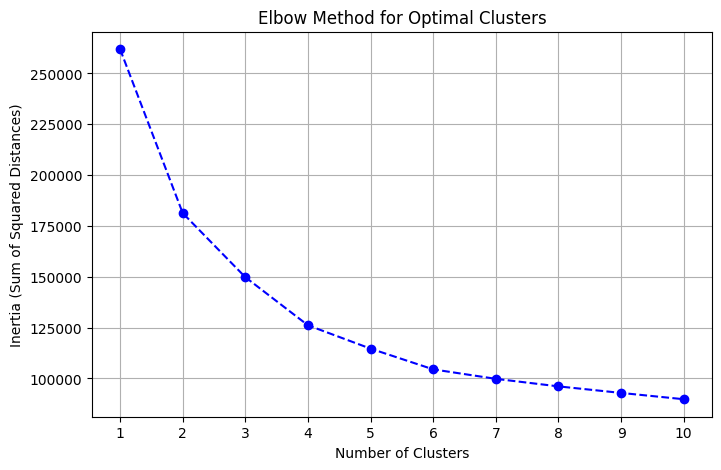

In [ ]:
# Drop Satisfaction_Index, Q9, and Q10
turkiye_approach1 = turkiye_dataset.drop(columns=["Satisfaction_Index", "Q9", "Q10"])

# Set target variable
X = turkiye_approach1.drop(columns=["Recommend_Instructor"])
y = turkiye_approach1["Recommend_Instructor"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Elbow Method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# For clustering, select only numeric columns and drop missing values
X_clustering = turkiye_approach1.select_dtypes(include=[np.number]).dropna()

# Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)  # Trying different cluster numbers from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal Clusters")
plt.grid(True)
plt.xticks(K_range)
plt.show()

Silhouette score for KMeans with 2 clusters: 0.2490
Silhouette score for KMeans with 3 clusters: 0.2227
Silhouette score for KMeans with 4 clusters: 0.2194
Silhouette score for KMeans with 5 clusters: 0.1984
Silhouette score for KMeans with 6 clusters: 0.2007
Silhouette score for KMeans with 7 clusters: 0.1912
Silhouette score for KMeans with 8 clusters: 0.1751
Silhouette score for KMeans with 9 clusters: 0.1701
Silhouette score for KMeans with 10 clusters: 0.1620


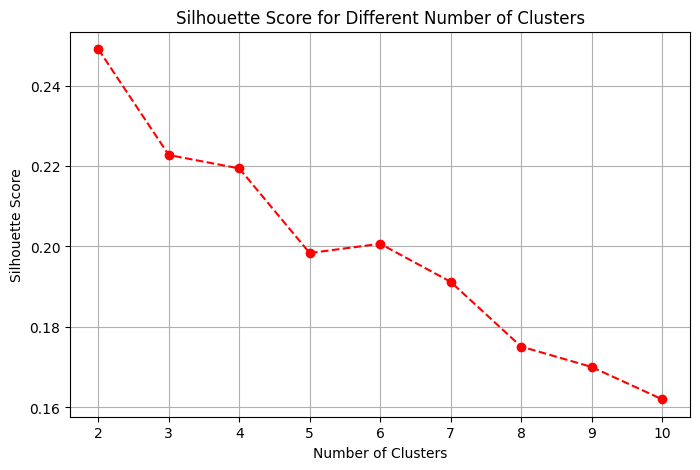

In [ ]:
# Silhouette Score for different cluster numbers (2 to 10 clusters)
from sklearn.metrics import silhouette_score

silhouette_avg_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_clustering)
    silhouette_avg = silhouette_score(X_clustering, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"Silhouette score for KMeans with {k} clusters: {silhouette_avg:.4f}")

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_avg_scores, marker='o', linestyle='--', color='r')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Number of Clusters")
plt.grid(True)
plt.show()

In [ ]:
# After analyzing the elbow method and silhouette score,
# choose the optimal number of clusters. Let's assume we found the best number of clusters to be 2.

optimal_clusters = 2

# KMeans and Agglomerative Clustering for Approach 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
agglom = AgglomerativeClustering(n_clusters=optimal_clusters)

# Generate cluster labels for the dataset using KMeans and Agglomerative Clustering
turkiye_approach1["cluster_label_kmeans"] = kmeans.fit_predict(X_clustering)
turkiye_approach1["cluster_label_agglom"] = agglom.fit_predict(X_clustering)

# Store results for different approaches
results = {}

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Bagging Classifier": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50),
    "Random Forest": RandomForestClassifier(n_estimators=50),
    "AdaBoost": AdaBoostClassifier(n_estimators=50),
    "Voting Classifier (Hard)": VotingClassifier(estimators=[
        ('lr', LogisticRegression()), ('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier())], voting='hard'),
    "Voting Classifier (Soft)": VotingClassifier(estimators=[
        ('lr', LogisticRegression()), ('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier())], voting='soft'),
    "SVM": SVC(kernel='linear', probability=True)
}

# Evaluate models for individual performance
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {"Individual Accuracy": acc}

# RFE + Stratified K-Fold Accuracy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
for name, model in models.items():
    # Apply RFE
    rfe = RFE(model, n_features_to_select=10)
    X_rfe = rfe.fit_transform(X_train, y_train)

    scores = []
    for train_idx, test_idx in cv.split(X_rfe, y_train):
        X_train_fold, X_test_fold = X_rfe[train_idx], X_rfe[test_idx]
        y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]
        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)
        scores.append(accuracy_score(y_test_fold, y_pred_fold))

    results[name]["RFE + K-Fold Accuracy"] = np.mean(scores)

# Evaluate models for clustering approach
for name, model in models.items():
    # Train on KMeans cluster labels
    y_cluster_kmeans = turkiye_approach1["cluster_label_kmeans"]
    X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_clustering, y_cluster_kmeans, test_size=0.3, random_state=42)
    model.fit(X_train_k, y_train_k)
    y_pred_k = model.predict(X_test_k)
    acc_kmeans = accuracy_score(y_test_k, y_pred_k)

    # Train on Agglomerative cluster labels
    y_cluster_agglom = turkiye_approach1["cluster_label_agglom"]
    X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_clustering, y_cluster_agglom, test_size=0.3, random_state=42)
    model.fit(X_train_a, y_train_a)
    y_pred_a = model.predict(X_test_a)
    acc_agglom = accuracy_score(y_test_a, y_pred_a)

    results[name]["KMeans Accuracy"] = acc_kmeans
    results[name]["Agglomerative Accuracy"] = acc_agglom

# Print final results summary in the desired format
print("==================== Final Results Summary ====================")
print("Classifier                       Performance (Accuracy)\n")
print("                                    Individual  RFE + KFold  KMeans  Agglomerative")

# Print the results in a well-aligned format
for name, res in results.items():
    print(f"{name:<35} {res['Individual Accuracy']:.2f}       {res['RFE + K-Fold Accuracy']:.2f}       {res.get('KMeans Accuracy', '-'):>8}   {res.get('Agglomerative Accuracy', '-'):>12}")


==================== Final Results Summary ====================
Classifier                         Satisfaction Index             KMeans Clustering             Agglomerative Clustering
                                 Individual   RFE + K-Fold   Individual   RFE + K-Fold   Individual   RFE + K-Fold
Logistic Regression                81.7        81.5           99.4        98.5           95.4        98.5
Decision Tree Classifier           77.4        80.6           94.8        95.1           92.5        95.1
Bagging Classifier                 80.7        84.7           96.8        96.5           95.1        96.5
Random Forest Classifier           77.4        86.9           94.8        97.7           92.5        97.7
Adaboost Classifier                84.4        83.0           97.4        97.8           94.8        97.8
XGBoost Classifier                 83.6        86.1           98.1        97.6           96.4        97.6
SVM                                 82.9        82.2           

##Applying methodologies of synthetic dataset

In [ ]:
import pandas as pd
import numpy as np
import itertools
import time

# =============== Scikit-Learn / XGBoost ===============
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

##########################################################
# (1) Load the "Cleaned_Turkiye_Dataset.csv"
##########################################################
df = pd.read_csv("Cleaned_Turkiye_Dataset.csv")

# -------------------------------------------------------------------
# Optionally, if your "Recommend_Instructor" has 3 classes (0,1,2) but
# you want only 2 classes for binary classification, you might do:
#    df = df[df["Recommend_Instructor"] != 1]   # for example
#    df["Recommend_Instructor"] = df["Recommend_Instructor"].replace({2:1})
# Or any other logic to transform to 0 vs 1
# -------------------------------------------------------------------

# Here we define X,y
# => Drop ONLY the target column from X
target_column = "Recommend_Instructor"
X = df.drop(columns=[target_column], errors="ignore")
y = df[target_column]

# (Train/Test split) - 70/30, as in your original code
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    shuffle=False
)

##########################################################
# (2) Define the 7 ML models
##########################################################
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Support Vector Machines": SVC(kernel='linear', random_state=42),
    "Adaboost Classifier": AdaBoostClassifier(n_estimators=30, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=30, random_state=42),
    "XG Boost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=30, random_state=42)
}

##########################################################
# (3) Define the dynamic RFE function
##########################################################
def recursive_feature_elimination(X_train, y_train):
    """
    Iteratively remove the feature with the lowest R^2 until:
      - removing further lowers training accuracy, or
      - training accuracy = 1.0, or
      - only 1 feature remains.
    Returns: list of selected feature names
    """
    selected_features = list(X_train.columns)
    prev_accuracy = 0

    while len(selected_features) > 1:
        # (a) Compute R-squared for each feature relative to y
        r_squared_values = {}
        for feature in selected_features:
            lr = LinearRegression()
            lr.fit(X_train[[feature]], y_train)
            r_squared_values[feature] = lr.score(X_train[[feature]], y_train)

        # (b) Identify the feature with the *lowest* R-squared
        feature_to_remove = min(r_squared_values, key=r_squared_values.get)
        selected_features.remove(feature_to_remove)

        # (c) Check accuracy after removing that feature
        temp_model = DecisionTreeClassifier()
        temp_model.fit(X_train[selected_features], y_train)
        new_accuracy = temp_model.score(X_train[selected_features], y_train)

        # (d) Stop if accuracy decreases or hits 100%
        if new_accuracy < prev_accuracy or new_accuracy == 1.0:
            break

        prev_accuracy = new_accuracy

    return selected_features

##########################################################
# (4) 49-combo "Boosting Chain" approach
##########################################################
results = []

# We'll do cartesian product of the model dictionary
for model1_name, model2_name in itertools.product(models.keys(), repeat=2):
    start_time = time.time()
    print(f"\nTraining {model1_name} -> {model2_name}")

    # ------------------------
    # (A) Train First Model on the full feature set
    # ------------------------
    model1 = models[model1_name]
    model1.fit(X_train, y_train)
    y_train_pred = model1.predict(X_train)
    y_test_pred  = model1.predict(X_test)

    # Accuracy after first model
    accuracy_model1 = round(accuracy_score(y_test, y_test_pred)*100, 2)
    print(f"Accuracy after {model1_name}: {accuracy_model1}%")

    # ------------------------
    # (B) Dynamic RFE for First Model
    #     + "First_Prediction" feature
    # ------------------------
    X_train_copy = X_train.copy()
    X_test_copy  = X_test.copy()

    # Insert the first model's train/test predictions as a new feature
    X_train_copy["First_Prediction"] = y_train_pred
    X_test_copy["First_Prediction"]  = y_test_pred

    selected_features_model1 = recursive_feature_elimination(X_train_copy, y_train)

    X_train_reduced_model1 = X_train_copy[selected_features_model1]
    X_test_reduced_model1  = X_test_copy[selected_features_model1]

    # Retrain first model on reduced features
    model1.fit(X_train_reduced_model1, y_train)
    y_test_pred_rfe1 = model1.predict(X_test_reduced_model1)

    accuracy_model1_rfe = round(accuracy_score(y_test, y_test_pred_rfe1)*100, 2)
    print(f"Accuracy after Dynamic RFE for {model1_name}: {accuracy_model1_rfe}%")

    # ------------------------
    # (C) Train Second Model on the reduced feature set
    # ------------------------
    model2 = models[model2_name]
    model2.fit(X_train_reduced_model1, y_train)
    y_test_pred2 = model2.predict(X_test_reduced_model1)

    accuracy_model2 = round(accuracy_score(y_test, y_test_pred2)*100, 2)
    print(f"Accuracy after {model2_name}: {accuracy_model2}%")

    # ------------------------
    # (D) Dynamic RFE for Second Model
    # ------------------------
    selected_features_model2 = recursive_feature_elimination(X_train_reduced_model1, y_train)

    X_train_reduced_model2 = X_train_reduced_model1[selected_features_model2]
    X_test_reduced_model2  = X_test_reduced_model1[selected_features_model2]

    # Retrain second model on the further-reduced feature set
    model2.fit(X_train_reduced_model2, y_train)
    y_test_pred_rfe2 = model2.predict(X_test_reduced_model2)

    accuracy_model2_rfe = round(accuracy_score(y_test, y_test_pred_rfe2)*100, 2)
    print(f"Accuracy after Dynamic RFE for {model2_name}: {accuracy_model2_rfe}%")

    elapsed = round(time.time() - start_time, 2)
    print(f"Completed {model1_name} -> {model2_name} in {elapsed}s")

    # ------------------------
    # (E) Store results
    # ------------------------
    results.append({
        "First Model": model1_name,
        "Accuracy after First Model (%)": accuracy_model1,
        "Accuracy after Dynamic RFE for First Model (%)": accuracy_model1_rfe,
        "Second Model": model2_name,
        "Accuracy after Second Model (%)": accuracy_model2,
        "Accuracy after Dynamic RFE for Second Model (%)": accuracy_model2_rfe
    })


Training Decision Tree -> Decision Tree
Accuracy after Decision Tree: 100.0%
Accuracy after Dynamic RFE for Decision Tree: 100.0%
Accuracy after Decision Tree: 100.0%
Accuracy after Dynamic RFE for Decision Tree: 100.0%
Completed Decision Tree -> Decision Tree in 0.48s

Training Decision Tree -> Logistic Regression
Accuracy after Decision Tree: 100.0%
Accuracy after Dynamic RFE for Decision Tree: 100.0%
Accuracy after Logistic Regression: 100.0%
Accuracy after Dynamic RFE for Logistic Regression: 100.0%
Completed Decision Tree -> Logistic Regression in 2.58s

Training Decision Tree -> Support Vector Machines
Accuracy after Decision Tree: 100.0%
Accuracy after Dynamic RFE for Decision Tree: 100.0%
Accuracy after Support Vector Machines: 100.0%
Accuracy after Dynamic RFE for Support Vector Machines: 100.0%
Completed Decision Tree -> Support Vector Machines in 1.35s

Training Decision Tree -> Adaboost Classifier
Accuracy after Decision Tree: 100.0%
Accuracy after Dynamic RFE for Decision

In [ ]:
##########################################################
# (5) Save and display results
##########################################################
results_df = pd.DataFrame(results)
results_df.to_csv("ML_Model_Comparison_Detailed.csv", index=False)

print("\n✅ Model training completed! Results saved to 'ML_Model_Comparison_Detailed.csv'.\n")
print("========== ML Model Comparison Results ==========\n")
print(results_df.to_string(index=False))


✅ Model training completed! Results saved to 'ML_Model_Comparison_Detailed.csv'.

========== ML Model Comparison Results ==========

                 First Model  Accuracy after First Model (%)  Accuracy after Dynamic RFE for First Model (%)                 Second Model  Accuracy after Second Model (%)  Accuracy after Dynamic RFE for Second Model (%)
               Decision Tree                          100.00                                          100.00                Decision Tree                           100.00                                           100.00
               Decision Tree                          100.00                                          100.00          Logistic Regression                           100.00                                           100.00
               Decision Tree                          100.00                                          100.00      Support Vector Machines                           100.00                                    